# Default land/ocean mask

When crunching data with netCDF-SCM, we want to cut files into (at least) Northern/Southern Hemisphere, land/ocean boxes. However, we don't always have access to land-surface fraction information from the raw model output. In these cases, we simply apply a default land/ocean mask instead. In this notebook, we show how this mask looks and how it was derived.

## Imports


In [1]:
import iris
import numpy as np

In [2]:
from matplotlib import pyplot as plt
import iris.plot as iplt
import iris.quickplot as qplt

## Default mask

Our default mask lives in `netcdf_scm.masks`. We can access it using `netcdf_scm.masks.get_default_sftlf_cube`.

In [3]:
from netcdf_scm.weights import get_default_sftlf_cube

In [4]:
default_sftlf = get_default_sftlf_cube()

/data/ubuntu-znicholls/miniconda3/envs/netcdf-scm/lib/python3.9/site-packages/iris/coords.py:1192: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  warnings.warn('Coordinate {!r} is not bounded, guessing '
/data/ubuntu-znicholls/miniconda3/envs/netcdf-scm/lib/python3.9/site-packages/iris/coords.py:1192: UserWarning: Coordinate 'latitude' is not bounded, guessing contiguous bounds.
  warnings.warn('Coordinate {!r} is not bounded, guessing '


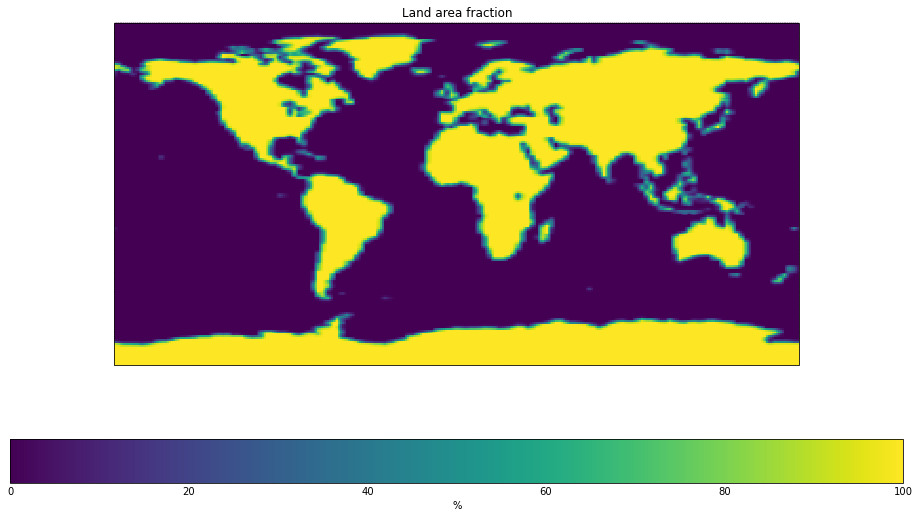

In [5]:
# NBVAL_IGNORE_OUTPUT
fig = plt.figure(figsize=(16, 9))
qplt.pcolormesh(default_sftlf,);

In [6]:
zoomed = default_sftlf.extract(
    iris.Constraint(latitude=lambda cell: -45 < cell < -25)
    & iris.Constraint(longitude=lambda cell: 120 < cell < 160)
)

/data/ubuntu-znicholls/miniconda3/envs/netcdf-scm/lib/python3.9/site-packages/iris/coords.py:1192: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  warnings.warn('Coordinate {!r} is not bounded, guessing '
/data/ubuntu-znicholls/miniconda3/envs/netcdf-scm/lib/python3.9/site-packages/iris/coords.py:1192: UserWarning: Coordinate 'latitude' is not bounded, guessing contiguous bounds.
  warnings.warn('Coordinate {!r} is not bounded, guessing '


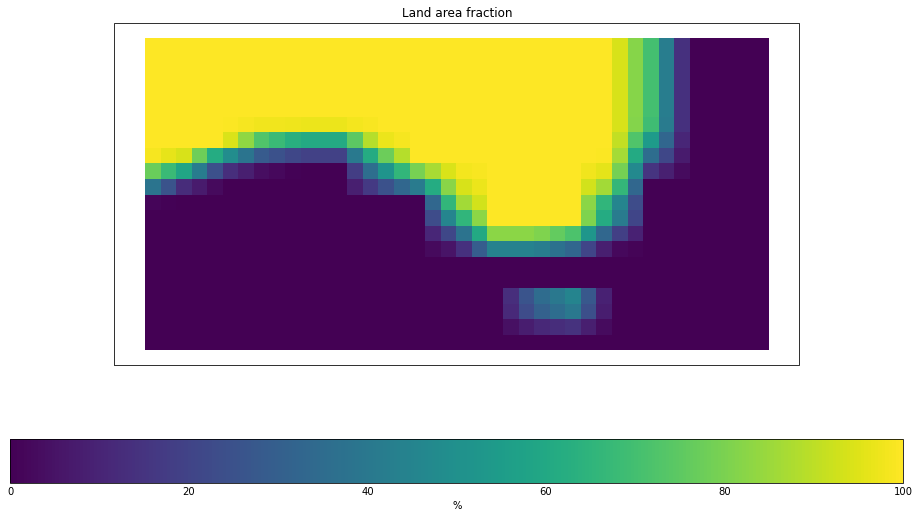

In [7]:
# NBVAL_IGNORE_OUTPUT
fig = plt.figure(figsize=(16, 9))
qplt.pcolormesh(zoomed,);

## Deriving the mask

To derive the mask, we simply use the mask from the IPSL-CM6A-LR model in CMIP6.

In [8]:
source_file = "../../../tests/test-data/cmip6output/CMIP6/CMIP/IPSL/IPSL-CM6A-LR/historical/r1i1p1f1/fx/sftlf/gr/v20180803/sftlf_fx_IPSL-CM6A-LR_historical_r1i1p1f1_gr.nc"

In [9]:
comp_cube = iris.load_cube(source_file)

/data/ubuntu-znicholls/miniconda3/envs/netcdf-scm/lib/python3.9/site-packages/iris/fileformats/cf.py:803: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'sftlf'
  warnings.warn(message % (variable_name, nc_var_name))


/data/ubuntu-znicholls/miniconda3/envs/netcdf-scm/lib/python3.9/site-packages/iris/coords.py:1192: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  warnings.warn('Coordinate {!r} is not bounded, guessing '
/data/ubuntu-znicholls/miniconda3/envs/netcdf-scm/lib/python3.9/site-packages/iris/coords.py:1192: UserWarning: Coordinate 'latitude' is not bounded, guessing contiguous bounds.
  warnings.warn('Coordinate {!r} is not bounded, guessing '


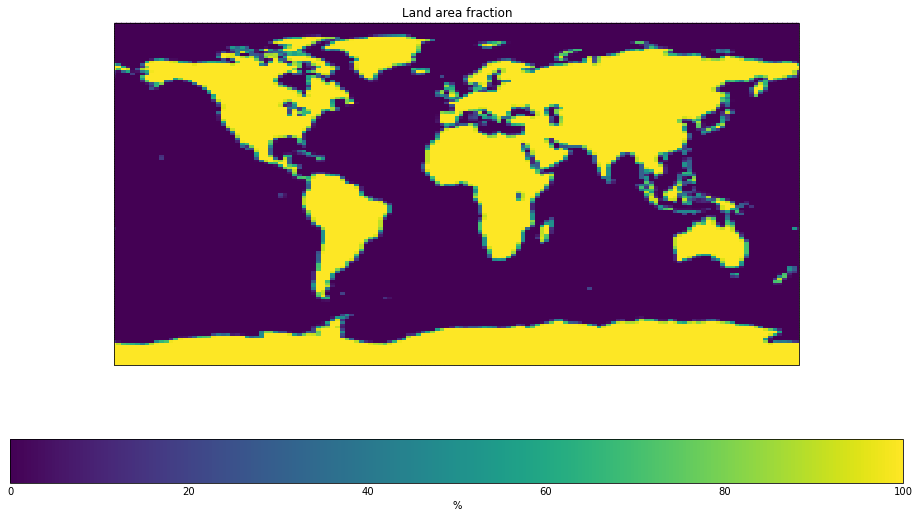

In [10]:
# NBVAL_IGNORE_OUTPUT
fig = plt.figure(figsize=(16, 9))
qplt.pcolormesh(comp_cube);

In [11]:
sample_points = [
    ("longitude", np.arange(0.5, 360, 1)),
    ("latitude", np.arange(-89.5, 90, 1)),
]

In [12]:
comp_cube_interp = comp_cube.interpolate(sample_points, iris.analysis.Linear())
comp_cube_interp.attributes[
    "history"
] = "Interpolated to a 1deg x 1deg grid using iris.interpolate with linear interpolation"
comp_cube_interp.attributes[
    "title"
] = "Default land area fraction assumption in netcdf-scm. Base on {}".format(
    comp_cube_interp.attributes["title"]
)

In [13]:
iris.save(comp_cube_interp, "default_weights.nc")
!ncdump -h default_weights.nc

netcdf default_weights {
dimensions:
	lat = 180 ;
	lon = 360 ;
	string8 = 8 ;
variables:
	float sftlf(lat, lon) ;
		sftlf:standard_name = "land_area_fraction" ;
		sftlf:long_name = "Land Area Fraction" ;
		sftlf:units = "%" ;
		sftlf:cell_methods = "area: mean" ;
		sftlf:coordinates = "type" ;
	double lat(lat) ;
		lat:axis = "Y" ;
		lat:units = "degrees_north" ;
		lat:standard_name = "latitude" ;
		lat:long_name = "Latitude" ;
	double lon(lon) ;
		lon:axis = "X" ;
		lon:units = "degrees_east" ;
		lon:standard_name = "longitude" ;
		lon:long_name = "Longitude" ;
	char type(string8) ;
		type:units = "1" ;
		type:standard_name = "area_type" ;
		type:long_name = "Land area type" ;

// global attributes:
		:CMIP6_CV_version = "cv=6.2.3.5-2-g63b123e" ;
		:EXPID = "historical" ;
		:NCO = "\"4.6.0\"" ;
		:activity_id = "CMIP" ;
		:branch_method = "standard" ;
		:branch_time_in_child = 0. ;
		:branch_time_in_parent = 21914. ;
		:contact = "ipsl-cmip6@listes.ipsl.fr" ;
		:creation_date = "2018-0

/data/ubuntu-znicholls/miniconda3/envs/netcdf-scm/lib/python3.9/site-packages/iris/coords.py:1192: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  warnings.warn('Coordinate {!r} is not bounded, guessing '
/data/ubuntu-znicholls/miniconda3/envs/netcdf-scm/lib/python3.9/site-packages/iris/coords.py:1192: UserWarning: Coordinate 'latitude' is not bounded, guessing contiguous bounds.
  warnings.warn('Coordinate {!r} is not bounded, guessing '


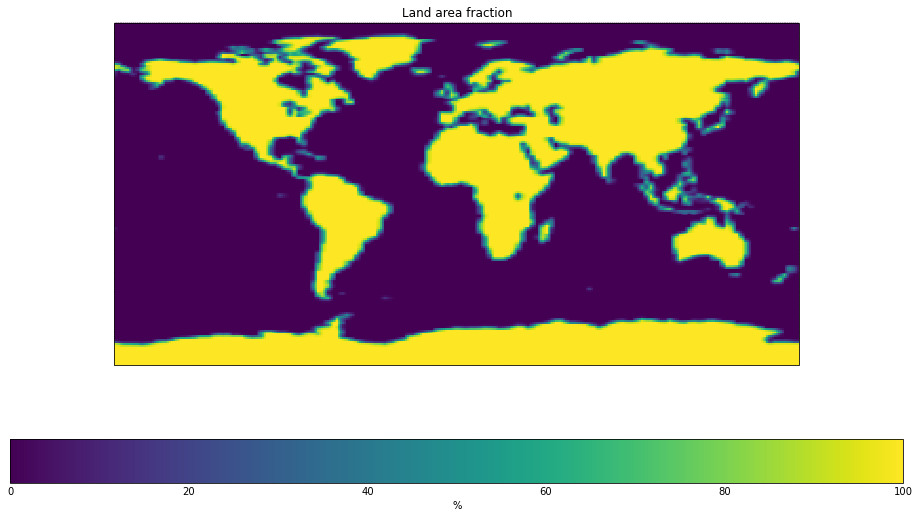

In [14]:
# NBVAL_IGNORE_OUTPUT
fig = plt.figure(figsize=(16, 9))
qplt.pcolormesh(comp_cube_interp);

In [15]:
comp_cube_regrid = comp_cube.regrid(default_sftlf, iris.analysis.Linear())

As expected, the default mask is more or less identical to the IPSL mask, even with regridding.

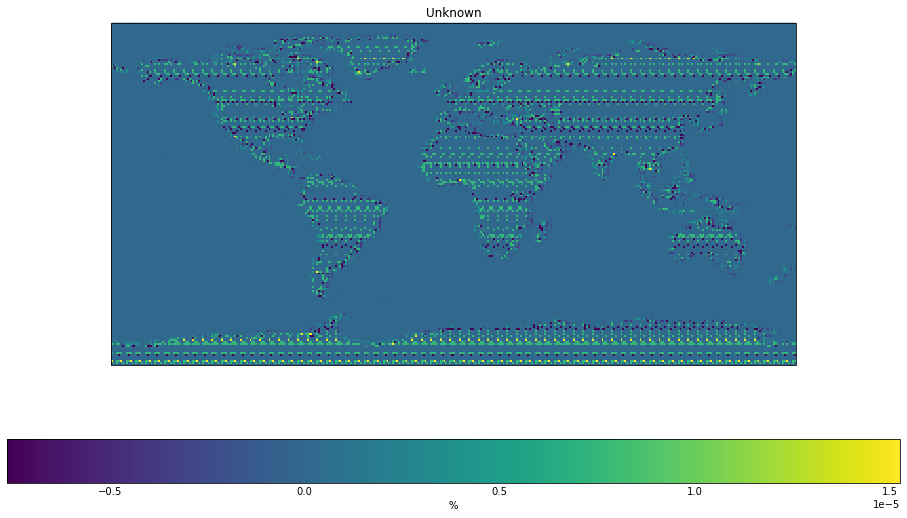

In [16]:
# NBVAL_IGNORE_OUTPUT
fig = plt.figure(figsize=(16, 9))
qplt.pcolormesh((default_sftlf - comp_cube_regrid));